In [1]:
import spacedecomp
from spacedecomp import FA
from tensorflow import keras
import torch
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
Y = (x_train).reshape(x_train.shape[0], -1)[::50]
Y = Y-(Y.mean(axis=0))
y_torch = torch.tensor(Y, dtype=torch.float) #to pytorch

In [45]:
model = FA(Y, laten_dim=2, train_loadings=True)

In [66]:
history = model.train(y_torch, lr=1e-1, epochs=500)

  0%|          | 0/500 [00:00<?, ?it/s]

Finished training


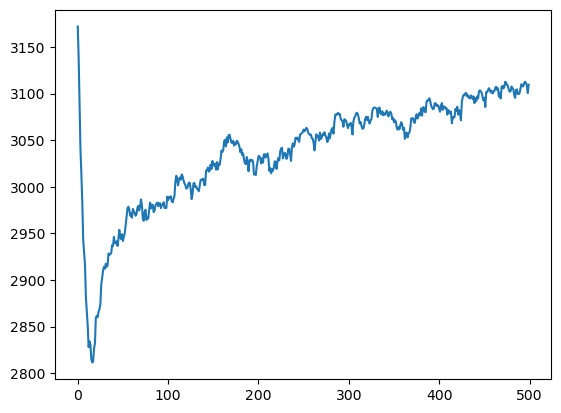

In [67]:
plt.plot(history)

In [68]:
F = model.get_factors()

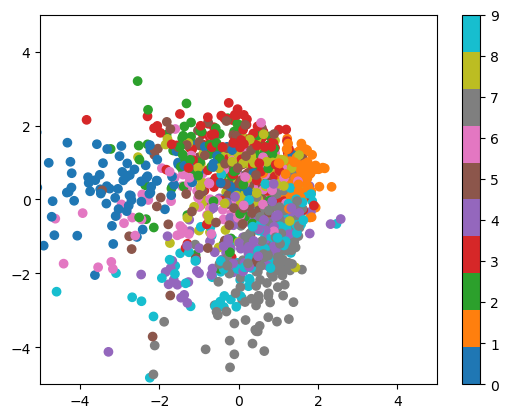

In [69]:
plt.scatter(F[:, 0], F[:, 1], c=y_train[::50], cmap='tab10')
plt.ylim([-5, 5])
plt.xlim([-5, 5])
plt.colorbar()

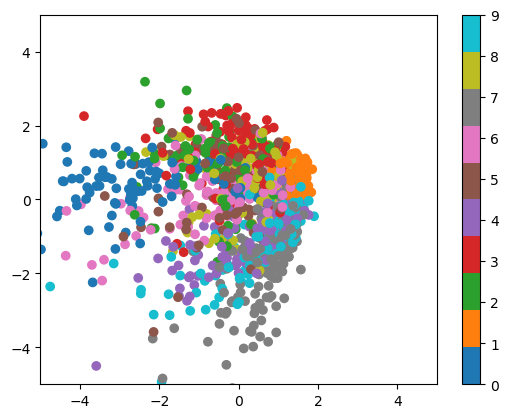

In [70]:
plt.scatter(model.f_qmean[:, 0].detach().cpu(), model.f_qmean[:, 1].detach().cpu(), c=y_train[::50], cmap='tab10')
plt.ylim([-5, 5])
plt.xlim([-5, 5])
plt.colorbar()